In [1]:
import pandas as pd
import numpy as np

In [4]:
mobile_data = pd.read_csv('train_mobile.csv')

In [5]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
mobile_data.shape

(2000, 21)

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
X = mobile_data.iloc[:,:20]
y = mobile_data.iloc[:,-1]

In [37]:
best_features = SelectKBest(score_func=chi2,k=10)
fit = best_features.fit(X,y)
best_scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featurescores = pd.concat([dfcolumns,best_scores],axis=1)
featurescores.columns=['Specs','Score']

In [38]:
featurescores.sort_values(by='Score',ascending=False)

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


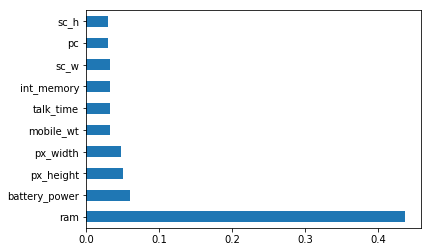

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
featureImportance = pd.Series(model.feature_importances_,index=X.columns)
featureImportance.nlargest(10).plot(kind='barh')
